<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/datasets/insurance.csv')

In [3]:
display(data.head(), data.shape,)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


(5000, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [5]:
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
Пол,1.000000,0.002074,0.014910,-0.008991,0.010140
Возраст,0.002074,1.000000,-0.019093,-0.006692,0.651030
Зарплата,0.014910,-0.019093,1.000000,-0.030296,-0.014963
Члены семьи,-0.008991,-0.006692,-0.030296,1.000000,-0.036290
Страховые выплаты,0.010140,0.651030,-0.014963,-0.036290,1.000000


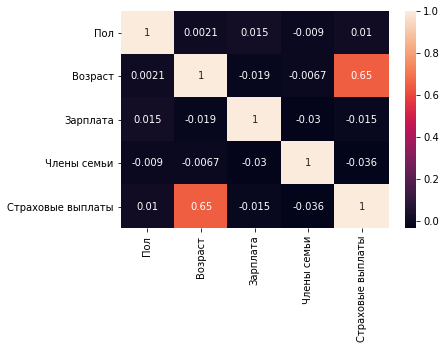

In [6]:
display(data.corr())
sns.heatmap(data.corr(), annot=True);

In [7]:
data.isna().sum()

Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

In [8]:
data.duplicated().sum()

153

**Вывод:** <br>
Данные загружены и имеют подходящий тип данных. Для удобства переведем возраст и зарплату в целочисленный формат, так как дробная часть не имеет значения в данном контексте. В таблице отсутствуют лишние столбцы и пропущенные значения. Дубликаты будут удалены, их происхождение неясно, однако они не являются необходимыми для обучения модели. Проверка основных статистических показателей не выявила явных выбросов. Наблюдается высокая корреляция между возрастом и зарплатой (коэффициент корреляции 0.65).

In [9]:
data = data.drop_duplicates()
data['Возраст'] = data['Возраст'].astype("int64")
data['Зарплата'] = data['Зарплата'].astype("int64")

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** ...

**Обоснование:** ...

In [10]:
features = data.drop('Страховые выплаты',axis=1)
target = data['Страховые выплаты']

In [11]:
X = np.concatenate((np.ones((features.shape[0], 1)), features), axis=1)
y = target
w = np.linalg.inv(X.T @ X) @ X.T @ y
display(w[1:])
model = LinearRegression()
model.fit(features, target)
model.coef_

array([ 9.46018167e-03,  3.61640080e-02, -1.38992804e-07, -1.42517375e-02])

array([ 9.46018167e-03,  3.61640080e-02, -1.38992804e-07, -1.42517375e-02])

*Коэфициенты регрессии совпадают на 100%. Теперь перейдем к теоретической части.*

**Вопрос:** Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?

**Ответ:** не изменится.

**Обоснование:** <br>
Умножение матрицы на матрицу возможно, если ширина первой матрицы $А(m*n)$ равна высоте второй матрицы $P(n*r)$. Тогда размер произведения этих матриц будет $m*r$. Размерность n «cхлопывается».<br>
При умножении признаков выборки $A$ размерностью $(3750,4)$ на обратимую произвольную матрицу $P$ размерностью $(4,4)$, результатом получаем новый (изменённый) набор данных скалярных произведений $M$ размернотью $(3750,4)$

Формула выглядит следующим образом:
$$
M_{ij} = (A_{i},B_{j})
$$

В каждую новую ячейку записывается результат сложения произведений строки $i$ на столбец $j$. Так например в первой ячейке новой таблицы будет записан результат по этой формуле:
$$
M_{11} = A_{11}*P_{11}+A_{12}*P_{21}+A_{13}*P_{31}+A_{14}*P_{41}
$$

Далее вычисляется важный параметр - вектор $w$ по формуле:
$$
w = (X^TX)^{-1}X^Ty
$$

В которой $X$ - таблица признков, где нулевой столбец заполнен $1$(единицами), а $y$ - вектор целевого признака
$$
X_i = (1M_{i2}M_{i3}M_{i4}M_{i5})
$$

В `Линейной регрессии` предсказания вычисляются по формуле:
$$
a = Xw + w0
$$
, где $w0$- значение нулевого аргумента вектора $w$, которое предствляет собой величину сдвига модели, при подборе которого можно достигать более низкого значения среднеквадратичного отклонения $MSE$

Рассмотрим упрощённую запись формулы предсказания `Линейной регрессии` $a=X_iw$ , где $X_i$- новые строки признаков
Подставим вместо параметра $w$, формулу её вычисления:
$$
a = X_iw = X_i(X^TX)^{-1}X^Ty
$$

Упроситим формулу используя принцип ассоциативности $A(BC)=(AB)C$ и то, что транспонированное произведение матриц равно произведению транспонированных матриц взятых в обратном порядке $(AB)^T=B^TA^T$:
$$
a = X_i(X^TX)^{-1}X^Ty = X_iX^{-1}(X^T)^{-1}X^Ty = X_iX^{-1}y
$$

Домножим наши признаки на случайную матрицу $P$, в которой число строк равно чилу столбцов $X$ и $P$ - обратима, то есть из матрицы $P$ можно получить матрицу $P^{-1}$, при этом $PP^{-1} = E$, где $E$ - единичная матрица

Если обучить нашу модель на новых (изменённых) признаках, то модель найдёт новые коэффициенты $w'$:
$$
w' = (P^T X^T X P)^{-1} (XP)^T y
$$

Поставим скобочки чтобы лучше было видно: 
    
    
$$
w' = (P^T (X^T X) P)^{-1} P^T X^T y
$$    

И видим 3 квадратные матрицы: <br>
$
P^T, (X^T X), P
$   

Используем правило:   
$$(ABC)^{-1} = C^{-1}(AB)^{-1} = (BC)^{-1}A^{-1} = C^{-1}B^{-1}A^{-1}$$
    

Cледовательно раскрываем так:  
$$
w' = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y
$$    

Подставим их в формулу предсказания и упростим выражениe, ведь Произведения $PP^{-1}$ и $(P^T)^{-1}P^T$ дают единичные матрицы, которые можно исключить из уровнения.
$$
a' = X_iPw' = X_iPP^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y = X_i(X^TX)^{-1}X^Ty = X_iX^{-1}(X^T)^{-1}X^Ty = X_iX^{-1}y
$$

Таким образом мы пришли к заключению, о том что результат предсказания не изменится не смотря на измениения признаков, т.к. исходя из результатов наших преобразований очевидно, что $a = a'$ и $XP w' = X w$

## Алгоритм преобразования

**Алгоритм**<br>
Мы создаем квадратную матрицу, размер которой соответствует количеству признаков, и заполняем ее случайными числами. Затем мы проверяем, является ли эта матрица обратимой, то есть имеет обратную матрицу. Если матрица обратима, мы умножаем наши признаки на эту матрицу.<br>
<br>
Важно отметить, что требуется, чтобы матрица была обратимой, чтобы мы могли успешно восстановить исходные данные. В противном случае, если матрица необратима, мы не сможем расшифровать наши данные.


**Обоснование**<br>
Мы можем ожидать, что качество линейной регрессии будет одинаковым до и после преобразования данных. Преобразование данных не влияет на способность модели предсказывать целевой признак. Однако, эти действия имеют важное значение для защиты персональных данных клиентов. В случае возможной утечки данных, преобразование матрицы признаков обеспечивает дополнительную безопасность, поскольку злоумышленникам эти данные будут бесполезны.

## Проверка алгоритма

In [12]:
features.shape, target.shape

((4847, 4), (4847,))

In [13]:
matrix = np.random.randint(100,size = (4, 4))
matrix

array([[70, 27, 33, 71],
       [18, 49, 12,  4],
       [ 0, 33, 58, 14],
       [11, 25, 21,  7]])

In [14]:
matrix_inv = np.linalg.inv(matrix)
matrix_inv

array([[-0.00675319, -0.08128144, -0.07597338,  0.26688992],
       [ 0.00227885,  0.05623489,  0.02563711, -0.10652252],
       [-0.00686435, -0.05201241, -0.01472397,  0.12879346],
       [ 0.02306645,  0.08292631,  0.07199754, -0.28248409]])

In [15]:
model = LinearRegression(normalize=True).fit(features, target)
predictions = model.predict(features)
r2_score_value = r2_score(target, predictions)
print(f"R2_score: {r2_score_value:.13f}")

R2_score: 0.4302010046633


In [16]:
features_matrix = features.dot(matrix)

In [17]:
model = LinearRegression(normalize = True).fit(features_matrix, target)
predictions = model.predict(features_matrix)
r2_score_value = r2_score(target, predictions)
print(f"R2_score: {r2_score_value:.13f}")

R2_score: 0.4302010046633


### Вывод

Поскольку значения сошлись, мы успешно защитили данные пользователей, применив умножение на матрицу, при этом не потеряв качество модели.

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные загружены
- [ ]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [ ]  Указан правильный вариант ответа
    - [ ]  Вариант обоснован
- [ ]  Выполнен шаг 3: предложен алгоритм преобразования
    - [ ]  Алгоритм описан
    - [ ]  Алгоритм обоснован
- [ ]  Выполнен шаг 4: алгоритм проверен
    - [ ]  Алгоритм реализован
    - [ ]  Проведено сравнение качества моделей до и после преобразования